In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rakshu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Rakshu\Downloads\india-news-headlines.csv.zip",encoding="ISO-8859-1")
df

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [8]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Rakshu\Downloads\india-news-headlines.csv.zip",encoding="ISO-8859-1",parse_dates=['publish_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [26]:
#import re
import pandas as pd
from nltk.corpus import stopwords

df=pd.read_csv(r"C:\Users\Rakshu\Downloads\india-news-headlines.csv.zip",encoding="ISO-8859-1",parse_dates=['publish_date'])

df["new_headline"]=df["headline_text"]
df['new_headline']=df['new_headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_headline']=df['new_headline'].str.replace('[^\w\s]','',regex=True)

# but our data does have some stopwords ("the", "a", "an")

stop=stopwords.words('english')

df["new_headline"]=df["new_headline"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df

,publish_date,headline_category,headline_text,new_headline
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo disturbed ayodhya says vajpayee
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures hurriyat pak visit
2,2001-01-02,unknown,America's unwanted heading for India?,americas unwanted heading india
3,2001-01-02,unknown,For bigwigs; it is destination Goa,bigwigs destination goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses clear tourist traffic
...,...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,covid19 despite dip cases rajasthan among top ...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,covid19 despite dip cases rajasthan among top ...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,covid19 despite dip cases rajasthan among top ...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...,govt extends deadline use fastag till february 15


In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia=SIA()
results=[]
for headline in df['new_headline']:
    pol_score=sia.polarity_scores(headline)
    pol_score['headline']=headline
    results.append(pol_score)

In [20]:
df['score']=pd.DataFrame(results)['compound']
df.head()

,publish_date,headline_category,headline_text,new_headline,score
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo disturbed ayodhya says vajpayee,-0.3818
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures hurriyat pak visit,0.0000
2,2001-01-02,unknown,America's unwanted heading for India?,americas unwanted heading india,-0.2263
3,2001-01-02,unknown,For bigwigs; it is destination Goa,bigwigs destination goa,0.0000
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses clear tourist traffic,0.3818


In [21]:
def analysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['classification']=df['score'].apply(analysis)

df.head(10)

,publish_date,headline_category,headline_text,new_headline,score,classification
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo disturbed ayodhya says vajpayee,-0.3818,Negative
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures hurriyat pak visit,0.0000,Neutral
2,2001-01-02,unknown,America's unwanted heading for India?,americas unwanted heading india,-0.2263,Negative
3,2001-01-02,unknown,For bigwigs; it is destination Goa,bigwigs destination goa,0.0000,Neutral
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses clear tourist traffic,0.3818,Positive
5,2001-01-02,unknown,Dilute the power of transfers; says Riberio,dilute power transfers says riberio,0.0000,Neutral
6,2001-01-02,unknown,Focus shifts to teaching of Hindi,focus shifts teaching hindi,0.0000,Neutral
7,2001-01-02,unknown,IT will become compulsory in schools,become compulsory schools,0.0000,Neutral
8,2001-01-02,unknown,Move to stop freedom fighters' pension flayed,move stop freedom fighters pension flayed,0.4215,Positive
9,2001-01-02,unknown,Gilani claims he applied for passport 2 years ago,gilani claims applied passport 2 years ago,0.0000,Neutral


In [22]:
tb_counts = df.classification.value_counts()

tb_counts

Neutral     1671075
Negative     988541
Positive     764451
Name: classification, dtype: int64

([<matplotlib.patches.Wedge at 0x2b6ec679910>,
 [Text(0.041327757645362326, 1.0992233696787956, 'Neutral'),
  Text(-0.7408761707623124, -0.8130820989276379, 'Negative'),
  Text(1.031330415857106, -0.8711243156565021, 'Positive')],
 [Text(0.02254241326110672, 0.5995763834611613, '48.8%'),
  Text(-0.40411427496126123, -0.44349932668780245, '28.9%'),
  Text(0.6493561877618814, -0.5484856802281679, '22.3%')])

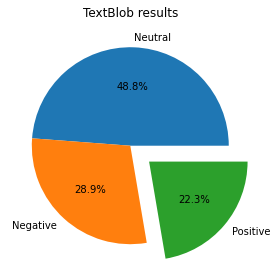

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)

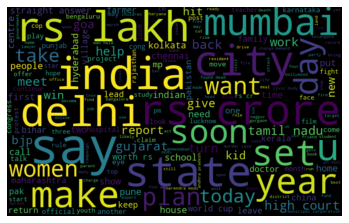

In [27]:
#Plotting our Wordcloud
from wordcloud import WordCloud
allWords=' '.join( [text for text in df['new_headline']])
wordCloud=WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()